# Coursera - Machine Learning by Andrew Ng

## Exercise 2 - Regularized Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data

data = pd.read_csv("ex2data2.txt", header=None)

data = data.values

print(data[:5])

X = data[:,0:2]
y = data[:,2]

[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]


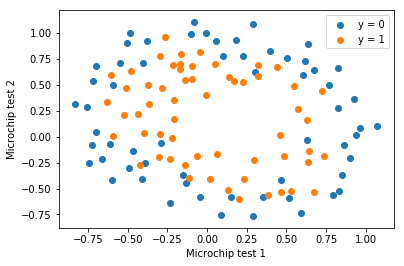

In [3]:
# ==================== Part 1: Plotting ====================
#  We start the exercise by first plotting the data to understand the 
#  the problem we are working with.

x_negative = X[y==0.]
x_positive = X[y==1.]

plt.scatter(x_negative[:,0], x_negative[:,1], label='y = 0')
plt.scatter(x_positive[:,0], x_positive[:,1], label='y = 1')

plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')
plt.legend()
plt.show()

In [4]:
# ============ Part 2: Compute Cost and Gradient ============
#  In this part of the exercise, you will implement the cost and gradient
#  for logistic regression. You neeed to complete the code in costFunction.m

#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to x and X_test
X = np.concatenate((np.ones((m,1)), X), axis = 1)

# Initialize fitting parameters
initial_theta = np.zeros((3))
print("Initial theta = " + str(initial_theta))

Initial theta = [ 0.  0.  0.]


In [5]:
# Sigmoid function
def sigmoid(z):  
    return np.divide(1, (1 + np.exp(-z)))

#Hypothesis function and cost function for logistic regression
from scipy.special import expit #Vectorized sigmoid function
def h(theta,X): #Logistic hypothesis function
    return expit(np.dot(X,theta))

#Cost function, default lambda (regularization) 0
def cost(theta,X,y,lambda_): 

    first = np.dot(-np.array(y).T,np.log(h(theta,X)))
    second = np.dot((1-np.array(y)).T,np.log(1-h(theta,X)))
    third = (lambda_/2) * np.sum(np.dot(theta[1:].T,theta[1:])) 
    return float( (1./m) * ( np.sum(first - second) + third ) )


# Gradient function
def gradient(theta, X, y, lambda_):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    m = len(X)

    parameters = int(theta.ravel().shape[0])
    
    #print(parameters)
    grad = np.zeros(parameters)
    
    print("shape of X" + str(X.shape))
    print("shape of theta" + str(theta.shape))

    #error = sigmoid(X * theta.T) - y
    error = sigmoid(X * theta.T) - y
    print("theta shape = " + str(theta.shape))
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        print("parameter = " + str(i))
        print("lambda_ = " + str(lambda_))
        print("theta[i] = " + str(theta.item((i))))
        print("i = " + str(i))
        print("term" + str(term))
        print("m = " + str(m))
        print("lambda_ = " + str(lambda_))
        grad[i] = (np.sum(term) / m) + (lambda_*theta.item((i))/m)
        #grad[i] = (np.sum(term) / m) + (lambda_*theta[i]) / m
        print("grad[i] = " + str(grad[i]))

    return grad

# Compute and display initial cost and gradient
lambda_ = 1
cost_initial = cost(initial_theta, X, y, lambda_)
print("Regularized cost at initial theta (zeros) = " + str(cost_initial))

gradient_initial = gradient(initial_theta, X, y, lambda_)
print("Gradient at initial theta (zeros) = " + str(gradient_initial))

Regularized cost at initial theta (zeros) = 0.6931471805599454
shape of X(118, 3)
shape of theta(1, 3)
theta shape = (1, 3)
parameter = 0
lambda_ = 1
theta[i] = 0.0
i = 0
term[[-0.5 -0.5 -0.5 ...,  0.5  0.5  0.5]
 [-0.5 -0.5 -0.5 ...,  0.5  0.5  0.5]
 [-0.5 -0.5 -0.5 ...,  0.5  0.5  0.5]
 ..., 
 [-0.5 -0.5 -0.5 ...,  0.5  0.5  0.5]
 [-0.5 -0.5 -0.5 ...,  0.5  0.5  0.5]
 [-0.5 -0.5 -0.5 ...,  0.5  0.5  0.5]]
m = 118
lambda_ = 1
grad[i] = 1.0
Gradient at initial theta (zeros) = [ 1.]


In [6]:
print(y[:5])

[ 1.  1.  1.  1.  1.]


In [7]:
# ============= Part 3: Optimizing using fminunc  =============
#  In this exercise, you will use a built-in function (fminunc) to find the
#  optimal parameters theta.

from scipy.special import expit #Vectorized sigmoid function

#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))#Regularized cost function
#def computeCost(theta,X,y,lambda_): 

    #first = np.dot(-np.array(y).T,np.log(h(theta,X)))
    #second = np.dot((1-np.array(y)).T,np.log(1-h(theta,X)))
    #third = (lambda_/2) * np.sum(np.dot(theta[1:].T,theta[1:]))
    #return float( (1./m) * ( np.sum(first - second) + third ) )

#lambda_ = 1

# Compute and display initial cost and gradient
cost_initial = cost(initial_theta, X, y, lambda_)

print("Cost at initial theta (zeros) = " + str(cost_initial))

from scipy import optimize

def optimizeTheta(theta,X,y,lambda_):
    result = optimize.fmin(cost, x0=theta, args=(X, y, lambda_), maxiter=400, full_output=True)
    return result[0], result[1]

mintheta, mincost = optimizeTheta(initial_theta,X,y, lambda_)

print("cost at optimum theta = " + str(cost(mintheta, X, y, lambda_)))
print("optimum theta = " + str(mintheta))

Cost at initial theta (zeros) = 0.6931471805599454
Optimization terminated successfully.
         Current function value: 0.690583
         Iterations: 104
         Function evaluations: 181
cost at optimum theta = 0.6905833528398168
optimum theta = [-0.01743325 -0.26539189 -0.01161251]


In [8]:
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#you should expect to see an admission probability of 0.776.
print(h(mintheta,np.array([1, 45.,85.])))

2.38303824981e-06


In [15]:
xvals = np.linspace(-1,1.5,50)
yvals = np.linspace(-1,1.5,50)
zvals = np.zeros((len(xvals),len(yvals)))
for i in range(len(xvals)):
    for j in range(len(yvals)):
        myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
    zvals[i][j] = np.dot(theta,myfeaturesij.T)
zvals = zvals.transpose()

u, v = np.meshgrid( xvals, yvals )
mycontour = plt.contour( xvals, yvals, zvals, [0])

NameError: name 'mapFeature' is not defined

NameError: name 'plotData' is not defined

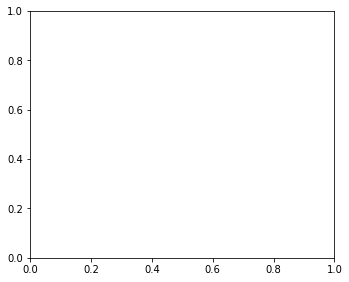

In [12]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(theta,mappedX,y,0.)

plt.subplot(222)
plotData()
plotBoundary(theta,mappedX,y,1.)

plt.subplot(223)
plotData()
plotBoundary(theta,mappedX,y,10.)

plt.subplot(224)
plotData()
plotBoundary(theta,mappedX,y,100.)

In [10]:
def makePrediction(mytheta, myx):
    return h(mytheta,myx) >= 0.5

#Divide the sample into two: ones with positive classification, one with null classification
#pos = np.array([X[i] for i in xrange(X.shape[0]) if y[i] == 1])
#neg = np.array([X[i] for i in xrange(X.shape[0]) if y[i] == 0])

#Compute the percentage of samples I got correct:
x_positive_predict = np.concatenate((np.ones((len(x_positive),1)), x_positive), axis = 1)
x_negative_predict = np.concatenate((np.ones((len(x_negative),1)), x_negative), axis = 1)

pos_correct = float(np.sum(makePrediction(mintheta,x_positive_predict)))
neg_correct = float(np.sum(np.invert(makePrediction(mintheta,x_negative_predict))))
tot = len(x_positive)+len(x_negative)
prcnt_correct = float(pos_correct+neg_correct)/tot
print("Fraction of training samples correctly predicted: " + str(prcnt_correct))

Fraction of training samples correctly predicted: 0.5423728813559322
